In [4]:
from sklearn.linear_model import Lasso
import mglearn
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [6]:
# 라소: 리지와 같이 절댓값 가중치(계수)를 0에 가깝게 만들려고 함(L1 규제)
# L1 규제 : 필요없는 특성은 계수를 0으로 만들어 버림.
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso.coef_ != 0))
# 결과는 과소접합 104개의 특성중 4개만 사용, 따라서 alpha를 적극 이용

훈련 세트 점수: 0.29
테스트 세트 점수 0.21
사용한 특성의 개수:  4


In [7]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso001.coef_ != 0))
# alpha 계수를 최소화하려함(기본값 1.0), max_iter : 반복 실행하는 최대 횟수

훈련 세트 점수: 0.90
테스트 세트 점수 0.77
사용한 특성의 개수:  33


In [8]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso00001.coef_ != 0))
# 결과: 과대적합

훈련 세트 점수: 0.95
테스트 세트 점수 0.64
사용한 특성의 개수:  96


In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['text.color'] = 'black'

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

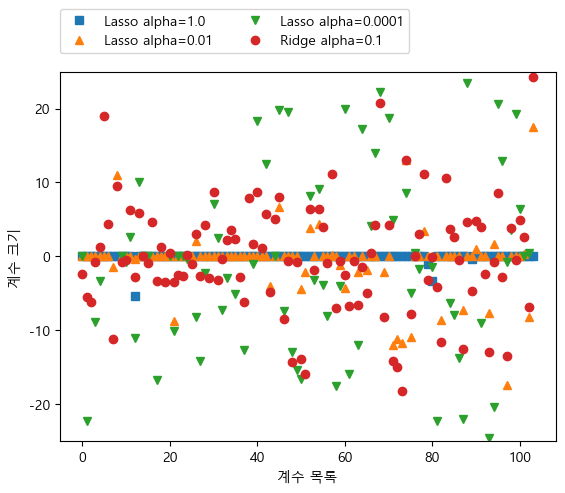

In [14]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1.0")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show()